# **Project Name** - Airline passenger satisfaction classification

##### **Project Type**    - Classification/supervised
##### **Contribution**    - Team
##### **Team Member 1 - Sumanyu Sharma**
##### **Team Member 2 - Sneha Sharma**
##### **Team Member 3 - Summit Singla**
##### **Team Member 4 - Vinayak Mehta**

# **Project Summary -**

Project Summary
This project used machine learning to understand what factors make airline customers happy or dissatisfied. We looked at data like age, travel class, and in-flight services to find patterns. By analyzing this information, we identified key aspects that strongly influence customer satisfaction. And, by using different graphs we have tried to make the data more interesting and easier to understand.

# **GitHub Link -**

# **Problem Statement**


Given survey data from an Airline, predict the satisfaction of a customer.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import math
warnings.filterwarnings("ignore")
custom_palette = ['#D80032', '#5FD068']

### Dataset Loading

In [ ]:
df=pd.read_csv("train.csv")
df.sample(20)
#20 random rows 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
47105,47105,71223,Female,disloyal Customer,27,Business travel,Eco,733,1,1,...,5,4,2,4,4,3,5,0,0.0,neutral or dissatisfied
20093,20093,111444,Male,Loyal Customer,58,Business travel,Eco,1024,2,3,...,2,3,3,3,4,4,2,65,40.0,neutral or dissatisfied
23694,23694,67287,Male,Loyal Customer,13,Personal Travel,Eco,985,1,4,...,4,5,3,5,5,4,4,0,0.0,neutral or dissatisfied
83310,83310,70683,Female,Loyal Customer,70,Personal Travel,Eco,447,2,4,...,2,2,2,2,4,2,5,0,0.0,neutral or dissatisfied
51902,51902,5559,Female,disloyal Customer,23,Business travel,Business,588,0,0,...,2,3,3,4,5,4,2,57,65.0,satisfied
82425,82425,50208,Male,Loyal Customer,73,Business travel,Eco,373,2,5,...,2,1,3,3,2,3,2,98,132.0,neutral or dissatisfied
90734,90734,4997,Male,disloyal Customer,22,Business travel,Eco,502,2,1,...,5,2,4,2,4,3,5,0,9.0,neutral or dissatisfied
58013,58013,1593,Female,Loyal Customer,37,Personal Travel,Eco,140,3,2,...,3,4,4,4,2,4,3,20,34.0,neutral or dissatisfied
101102,101102,101586,Female,Loyal Customer,30,Personal Travel,Eco,1099,3,3,...,2,1,5,1,1,3,2,4,8.0,neutral or dissatisfied
61399,61399,66363,Male,Loyal Customer,21,Personal Travel,Eco,986,2,5,...,4,4,3,5,3,5,4,23,25.0,neutral or dissatisfied


### Dataset First View

In [ ]:
df.head(20)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(103904, 25)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
# Dataset Duplicate Value Count
du=df.duplicated().sum()
du

0

In [ ]:
# Missing Values/Null Values Count
#indices = np.where(pd.isnull(df))
#indices.value_counts()
df.isnull().sum()

#print(indices).value_count()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
du=df.duplicated().value_counts()
du

False    103904
Name: count, dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

### What did you know about your dataset?

### Our dataset contains information related to customer satisfaction with airline services. It includes details such as gender, customer type, and age, along with travel specifics like the type of travel, class, and flight distance. Ratings for various in-flight services are provided.

## ***2. Understanding Your Variables***

### Print all the column names of your dataset

In [ ]:
# Dataset Columns
print(df.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


### Describe your dataset

In [ ]:
# Dataset Describe in /statistical way
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Variables Description

Unnamed: 0: An index or identifier for the records.

id: Unique identifier for each entry.

Gender: Gender of the passenger.

Customer Type: Type of customer (e.g., Loyal Customer).

Age: Age of the passenger.

Type of Travel: Purpose of the travel (e.g., Business travel).

Class: Travel class (e.g., Business, Economy).

Flight Distance: Distance of the flight.

Inflight wifi service: Rating for in-flight wifi service.

Departure/Arrival time convenient: Rating for the convenience of departure/arrival times.

Ease of Online booking: Rating for the ease of online booking.

Gate location: Rating for gate location convenience.

Food and drink: Rating for the quality of food and drink.

Online boarding: Rating for the online boarding process.

Seat comfort: Rating for the comfort of seats.

Inflight entertainment: Rating for in-flight entertainment.

On-board service: Rating for on-board services.

Leg room service: Rating for leg room service.

Baggage handling: Rating for baggage handling.

Checkin service: Rating for check-in service.

Inflight service: Rating for general in-flight service.

Cleanliness: Rating for cleanliness.

Departure Delay in Minutes: Duration of departure delay in minutes.

Arrival Delay in Minutes: Duration of arrival delay in minutes.

satisfaction: Overall satisfaction level (target variable).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Unnamed: 0:
[     0      1      2 ... 103901 103902 103903]

Unique values for id:
[ 70172   5047 110028 ...  68825  54173  62567]

Unique values for Gender:
['Male' 'Female']

Unique values for Customer Type:
['Loyal Customer' 'disloyal Customer']

Unique values for Age:
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]

Unique values for Type of Travel:
['Personal Travel' 'Business travel']

Unique values for Class:
['Eco Plus' 'Business' 'Eco']

Unique values for Flight Distance:
[ 460  235 1142 ...  974 1479  400]

Unique values for Inflight wifi service:
[3 2 4 1 5 0]

Unique values for Departure/Arrival time convenient:
[4 2 5 3 1 0]

Unique values for Ease of Online booking:
[3 2 5 4 1 0]

Unique values for Gate location:
[1 3 2 5 4 0]

Unique values for Food and drink:
[5 1 2 4 3 0]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
average_age_by_gender = df.groupby('Gender')['Age'].mean().astype(int)
#astype converts to certain datatype.
print(average_age_by_gender)

Gender
Female    39
Male      39
Name: Age, dtype: int64


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

### Generate a countplot to visually depict the distribution of passenger satisfaction levels in the airline dataset

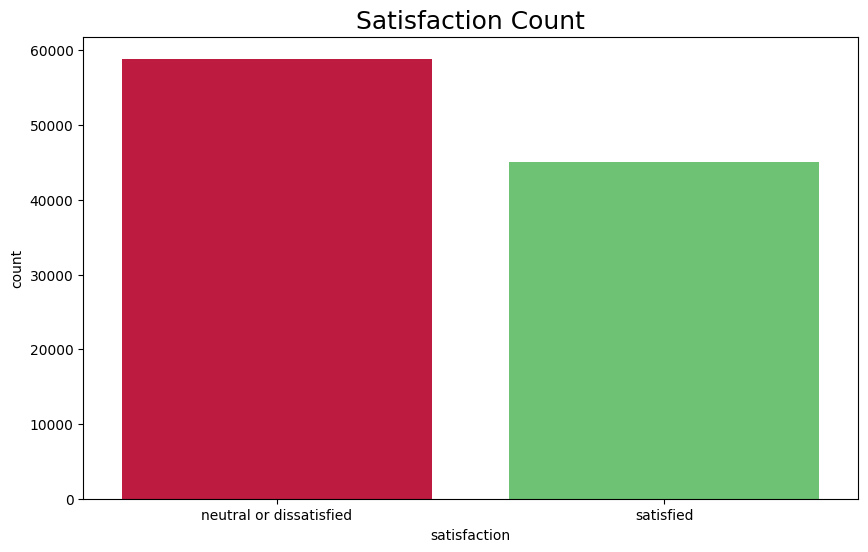

In [ ]:
#Countplot for counting the occurrences of each category
plt.figure(figsize=(10, 6))
plt.title('Satisfaction Count',fontsize=18)
# Plotting the count using sns.countplot
sns.countplot(x='satisfaction', data=df, hue='satisfaction',palette=custom_palette)
plt.show()

#### Chart - 2

### Visualize the distribution of passenger satisfaction levels in the airline dataset also include the percentage using a pie chart   

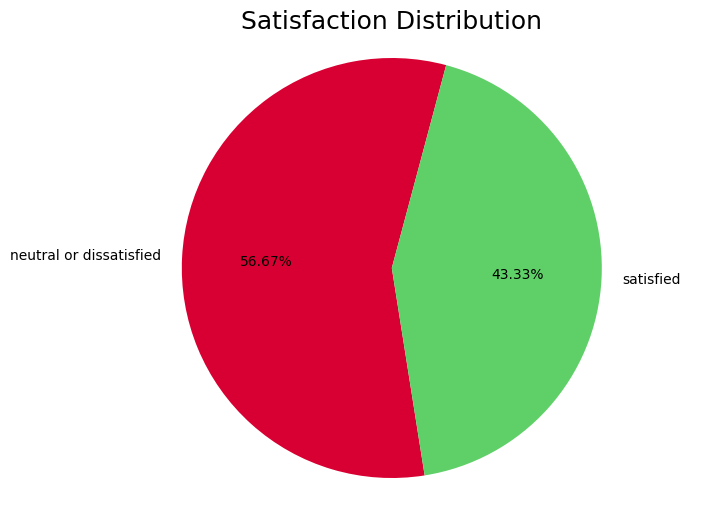

In [ ]:

label = list(df['satisfaction'].value_counts().index) #it returns the index of unique values
value = list(df['satisfaction'].value_counts().values) #it returns the values or counts of occurrences for each unique value in the specified column

plt.figure(figsize=(8, 6))
plt.pie(value, labels=label, autopct='%1.2f%%', startangle=75, colors=custom_palette)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Satisfaction Distribution',fontsize=18)
plt.show()

Pie charts are useful for visualizing the distribution of categorical data when you want to emphasize the proportion of each category 
relative to the whole dataset.

Showing Relative Proportions: Pie charts make it easy to see the relative proportions of different categories within a dataset. They visually represent each category's share of the whole.

Highlighting Dominant Categories: If there are one or a few dominant categories in your dataset(neutral or dissatisfied), a pie chart can effectively highlight these by displaying them as larger sectors.

it shows pretty clear in percentage how many people are satisfied and how many are not satisfied.
and what is the scope of improvement

#### Chart - 3

### Visualize the gender distribution in the airline dataset also include the percentage using a pie chart   

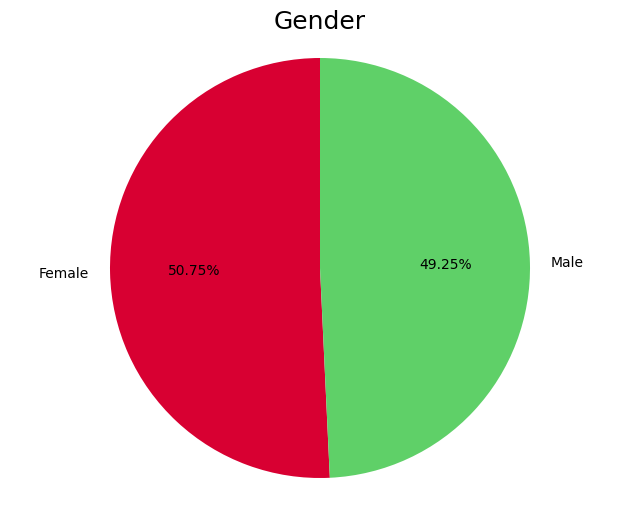

In [ ]:

label = list(df['Gender'].value_counts().index)
value = list(df['Gender'].value_counts().values) #it returns the values or counts of occurrences for each unique value in the specified column

plt.figure(figsize=(8, 6))
plt.pie(value, labels=label, autopct='%1.2f%%', startangle=90, colors=custom_palette)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Gender', fontsize=18)
plt.show()

basically making sure that if our services get affected by a particular gender or not which as we can see clearly from the graph thats not the case.
If it were to be a case like that we would target that particular gender more to provide them better service.

#### Chart - 4

### Visualize the distribution of loyal and disloyal customers  in the airline dataset also include the percentage using a pie chart   

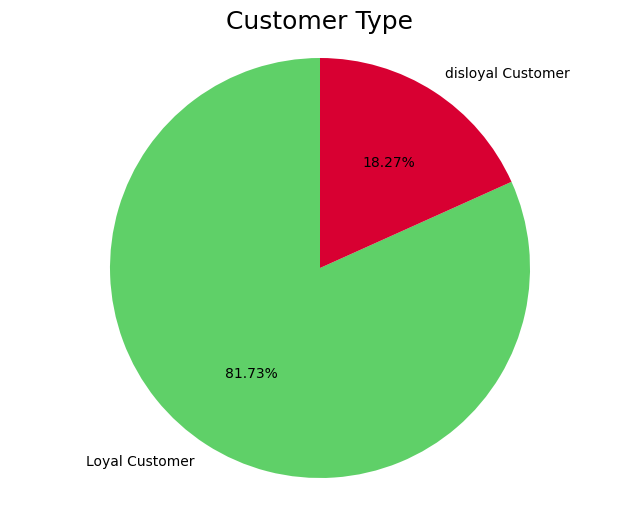

In [ ]:

label = list(df['Customer Type'].value_counts().index)
value = list(df['Customer Type'].value_counts().values)
plt.figure(figsize=(8, 6))
plt.pie(value, labels=label, autopct='%1.2f%%', startangle=90, colors=['#5FD068','#D80032'])
plt.axis('equal')
plt.title('Customer Type', fontsize=18)
plt.show()

#### Chart - 5

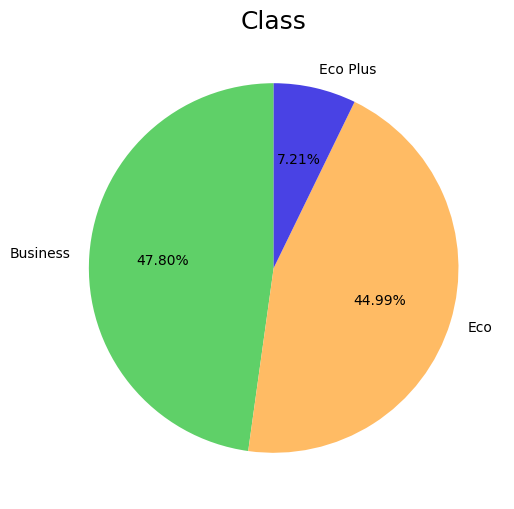

In [ ]:

label = list(df['Class'].value_counts().index)
value = list(df['Class'].value_counts().values)
plt.figure(figsize=(8, 6))
plt.pie(value, labels=label, autopct='%1.2f%%', startangle=90, colors=['#5FD068','#FFBB64', '#4942E4'])
plt.title('Class', fontsize=18)
plt.show()

#### Chart - 6

### Explore the distribution of passenger ages in the airline dataset using a Kernel Density Estimate (KDE) plot

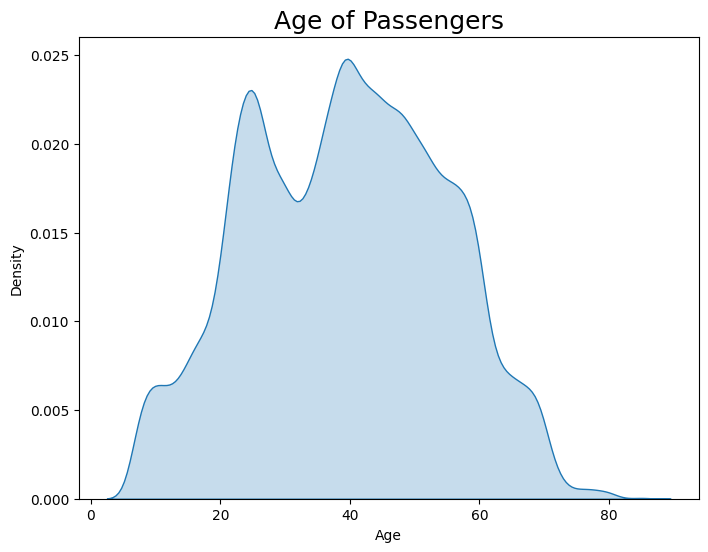

In [ ]:
# We're using Kernel Density Estimate to plot the age because age has a wide and continuos range of values
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], fill=True)
plt.title('Age of Passengers', fontsize=18)
plt.show()

#### Chart - 7

#### Visualize the count of satisfied and dissatisfied passengers with different variables from the dataset

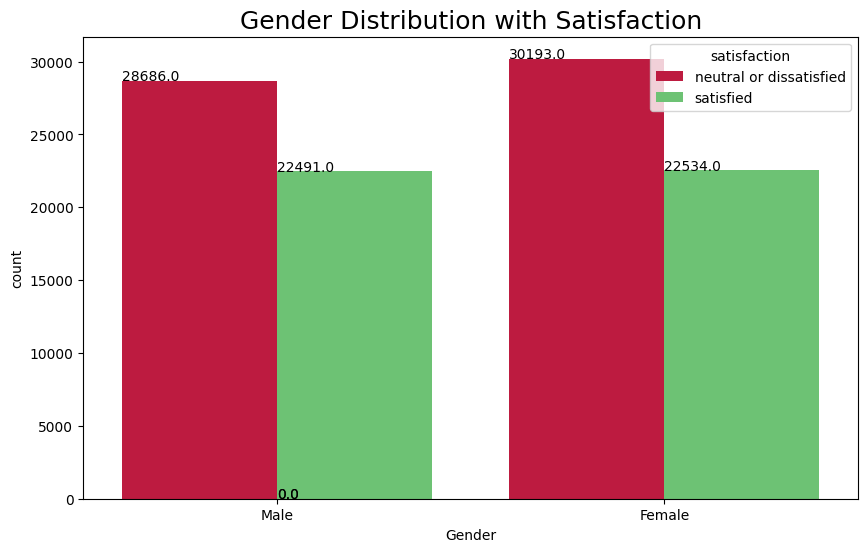

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Gender Distribution with Satisfaction',fontsize=18)
sns_plot = sns.countplot(x=df['Gender'], hue=df['satisfaction'], palette=custom_palette)
for p in sns_plot.patches:
      plt.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

#### Chart - 8

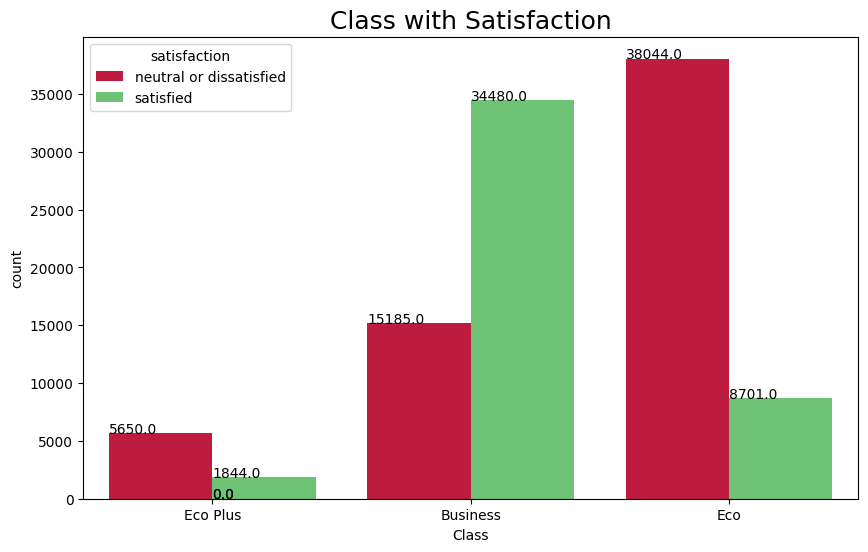

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Class with Satisfaction',fontsize=18)
sns_plot = sns.countplot(x=df['Class'], hue=df['satisfaction'], palette=custom_palette,)
for p in sns_plot.patches:
      plt.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

#### Chart - 9

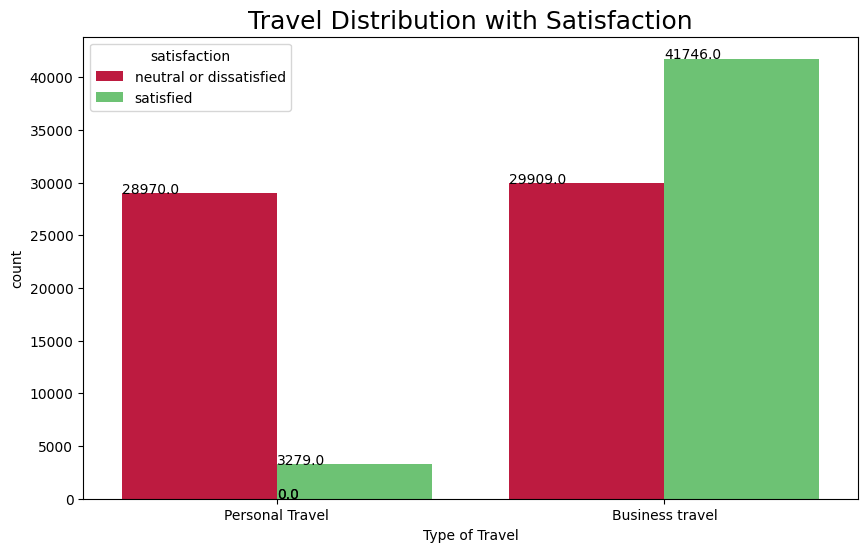

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Travel Distribution with Satisfaction',fontsize=18)
sns_plot = sns.countplot(x=df['Type of Travel'], hue=df['satisfaction'], palette=custom_palette)
for p in sns_plot.patches:
      plt.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

#### Chart - 10


### Determine the average age of passengers categorized by both gender and travel 

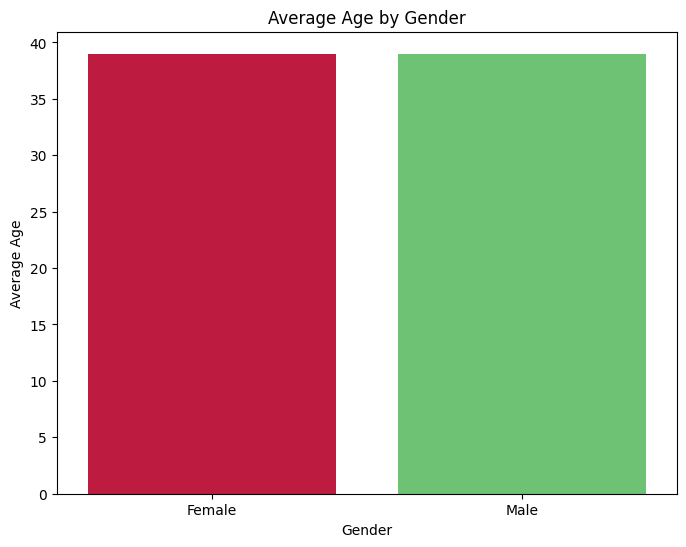

In [ ]:
average_age_by_gender = df.groupby('Gender')['Age'].mean().astype(int).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Age', data=average_age_by_gender, hue='Gender', palette = custom_palette)
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

In [ ]:
average_age_by_gender_class = df.groupby(['Gender', 'Class'])['Age'].mean().astype(int)
print(average_age_by_gender_class)

Gender  Class   
Female  Business    41
        Eco         37
        Eco Plus    38
Male    Business    41
        Eco         37
        Eco Plus    38
Name: Age, dtype: int64


#### Chart - 11

 ### Visualize the distribution of customer ratings for the "Check-in Service" in the airline dataset to gain insights into the level of satisfaction with the check-in process.

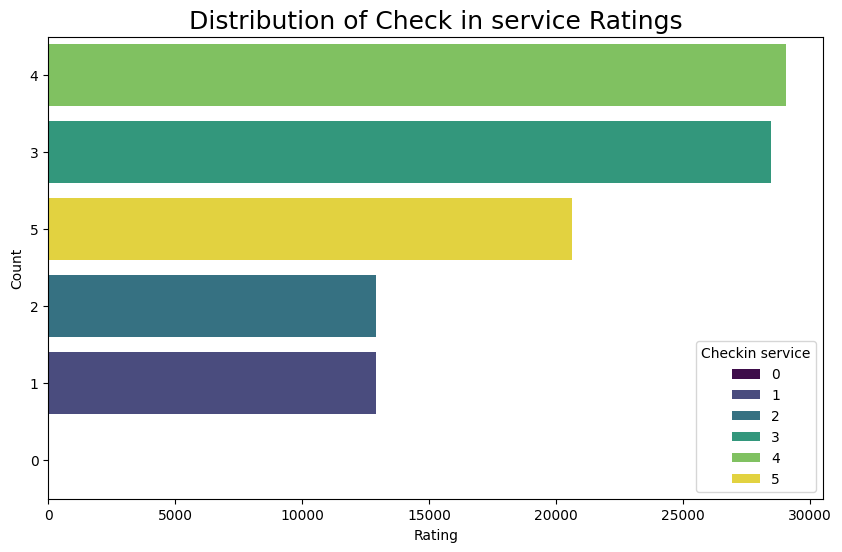

In [ ]:
plt.figure(figsize=(10, 6))
sns_plot=sns.countplot(y='Checkin service', data=df, order=df['Checkin service'].value_counts().index, palette='viridis', hue='Checkin service',legend=True)
plt.title('Distribution of Check in service Ratings', fontsize=18)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Chart - 12

### Visualize and analyze the distribution of customer ratings for the "Ease of Online Booking" feature in the airline dataset to provide a quick overview of customer satisfaction with the online booking process.

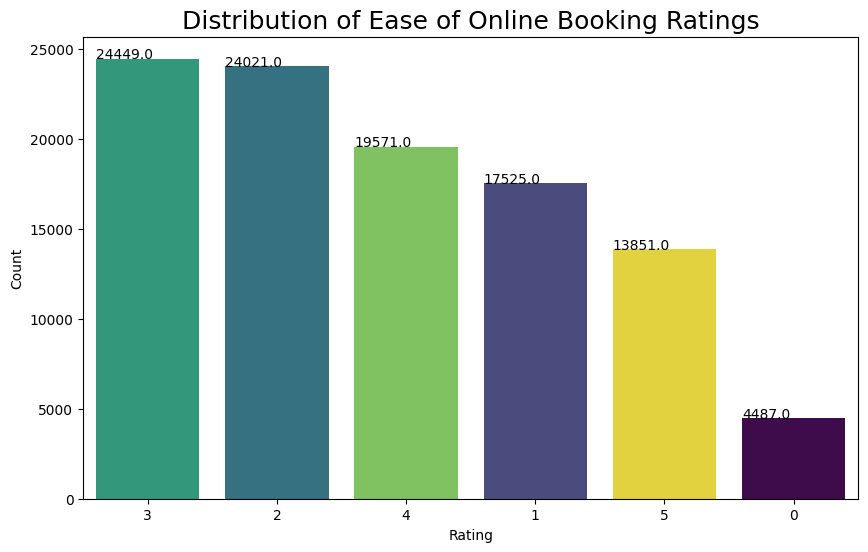

In [ ]:
plt.figure(figsize=(10, 6))
sns_plot=sns.countplot(x='Ease of Online booking', data=df, order=df['Ease of Online booking'].value_counts().index, palette='viridis', hue='Ease of Online booking', legend=False)
plt.title('Distribution of Ease of Online Booking Ratings', fontsize=18)
plt.xlabel('Rating')
plt.ylabel('Count')
for p in sns_plot.patches:
        plt.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

### Calculate the lower and upper bound to understand the spread of the central portion of the data and to detect outliers

In [ ]:
#to calculate lower and upper bound
iqr=np.percentile(df['Flight Distance'], 75)-np.percentile(df['Flight Distance'], 25)
lower_bound=np.percentile(df['Flight Distance'], 25)-(1.5*iqr)
upper_bound=np.percentile(df['Flight Distance'], 75)+(1.5*iqr)
print(lower_bound, upper_bound)

-1579.5 3736.5


#### Chart - 13

### Generate a boxplot  to identify the potential outliers and spread in the flight distances

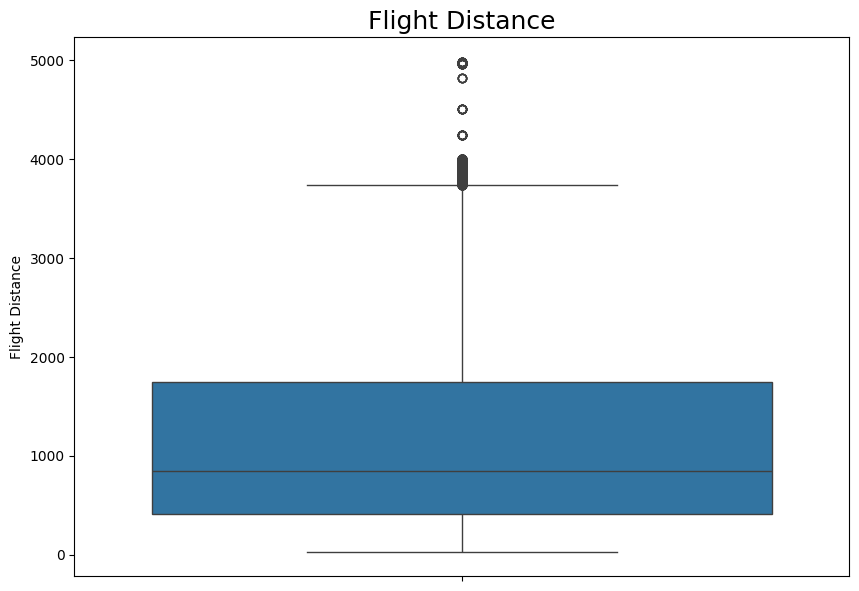

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Flight Distance',fontsize=18)
sns.boxplot(y='Flight Distance', data=df)
plt.show()

### Create a new data frame which doesn't have potential outliers

In [ ]:
#to remove outliers
df_no_outliers = df[(df['Flight Distance'] >= lower_bound) & (df['Flight Distance'] <= upper_bound)]


#### Chart - 14

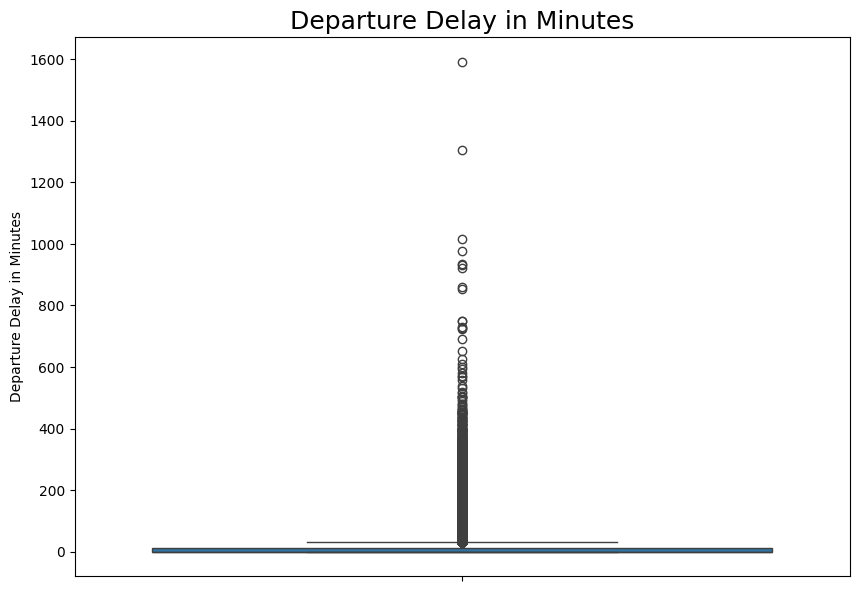

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Departure Delay in Minutes',fontsize=18)
sns.boxplot(y='Departure Delay in Minutes', data=df)
plt.show()

#### Chart - 15

 #### Generate a heatmap to visualize and analyze the strength and correlation between different variables

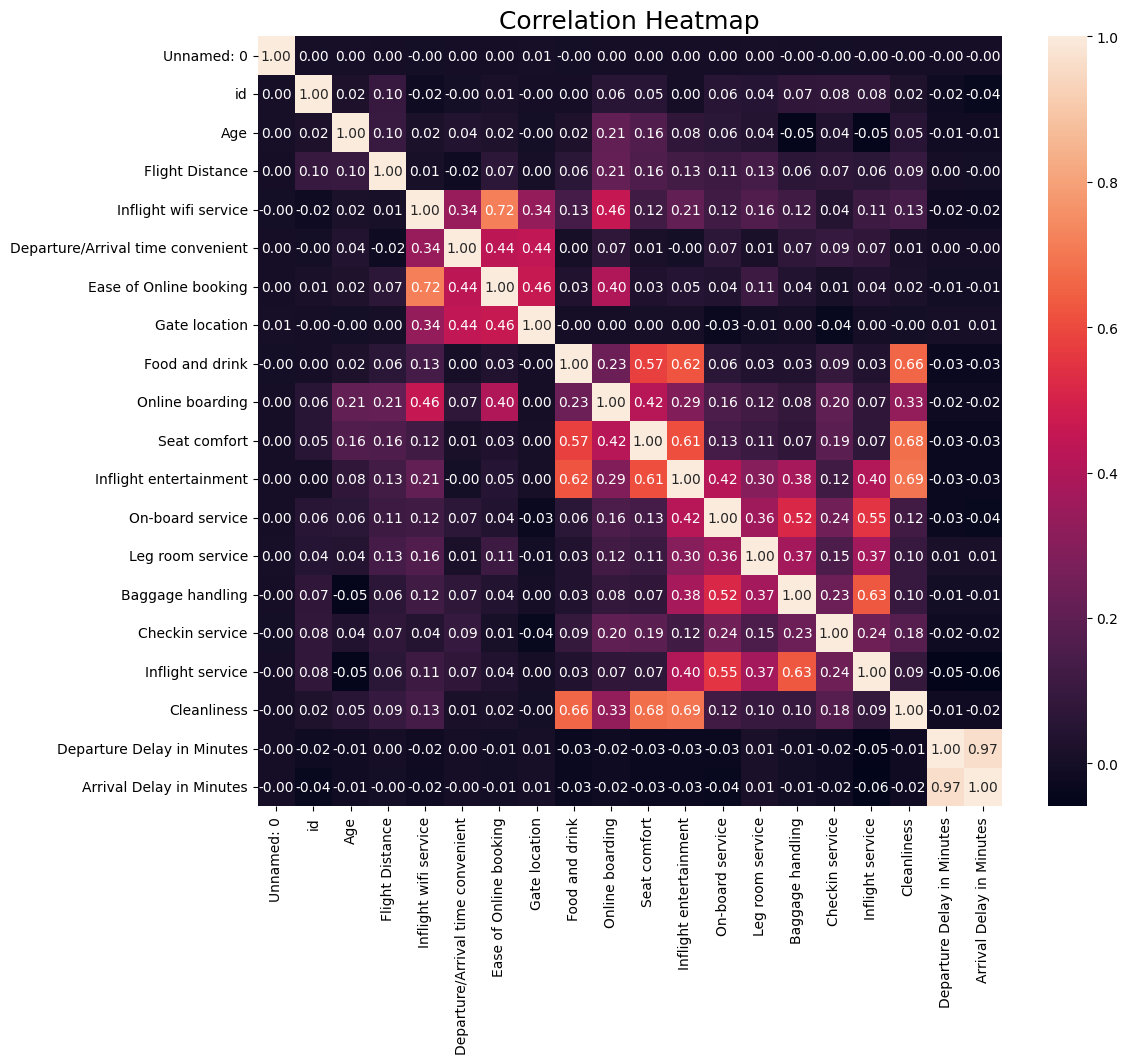

In [ ]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=18)
plt.show()


# 6. Feature Engineering & Data Pre-processing


#### 1. Handling Missing Values


In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
df.dropna(inplace=True)

What all missing value imputation techniques have you used and why did you use those techniques?

#### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      103594 no

#### 3 Feature Manipulation & Selection

In [ ]:
# df.drop(columns=['Unnamed: 0','Customer Type','Gate location','Type of Travel'], axis=1, inplace=True)

In [ ]:
for x in df.select_dtypes(include= 'object'):
    print(df[x].value_counts())

Gender
Female    52576
Male      51018
Name: count, dtype: int64
Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


#### 4. Categorical Encoding

In [ ]:
refactored_values = {
    'Gender':{
        'Male':0,
        'Female':1
    },
    'satisfaction':
    {
        'neutral or dissatisfied': 0,
        'satisfied':1
    },
    'Class':{
        'Business':0,
        'Eco':1,
        'Eco Plus':2
    }
}
df.replace(refactored_values,inplace=True)

In [ ]:
df.drop(columns='id', inplace=True)

What all categorical encoding techniques have you used & why did you use those techniques?

#### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Extract the columns to be scaled
columns_to_scale = ['Flight Distance']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



In [ ]:
df

,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,13,2,-0.731305,3,4,3,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,25,0,-0.956916,3,2,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,26,0,-0.047454,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,25,0,-0.629028,2,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,61,0,-0.977973,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,23,1,-1.000033,2,1,2,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,0,49,0,1.160818,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,0,30,0,0.807862,1,1,1,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,1,22,1,-0.189839,1,1,1,1,1,1,1,4,5,1,5,4,1,0,0.0,0


answer

Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

y = df['satisfaction']  # Dependent variable (target variable)
X = df.drop(columns=['satisfaction'])  # Independent variables (features)
X.shape, y.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

 ### Model-1 Random forest

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)
y_train_rf = rf_classifier.predict(X_train)
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf_train = accuracy_score(y_train, y_train_rf)



Random Forest Classifier Accuracy (Test Set): 0.9517351223514648
Random Forest Classifier Accuracy (Training Set): 0.9999879336349925
0.04826487764853516
0.0034736673714593743


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate precision
precision = precision_score(y_test, y_pred_rf)

# Calculate recall
recall = recall_score(y_test, y_pred_rf)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_rf)

# Calculate ROC-AUC score (assuming y_pred_rf contains class probabilities)
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


### Model-2 Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming X contains features and y contains labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='gini')  # You can choose 'gini' or 'entropy' as the criterion

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)
y_train_pred = dt_classifier.predict(X_train)
from sklearn.metrics import classification_report   

report_test = classification_report(y_test, y_pred)
print(report_test)

report_train = classification_report(y_train, y_train_pred)
print(report_train)




              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14662
           1       0.92      0.92      0.92     11237

    accuracy                           0.93     25899
   macro avg       0.93      0.93      0.93     25899
weighted avg       0.93      0.93      0.93     25899

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44035
           1       1.00      1.00      1.00     33660

    accuracy                           1.00     77695
   macro avg       1.00      1.00      1.00     77695
weighted avg       1.00      1.00      1.00     77695



In [ ]:

accuracy_dt = accuracy_score(y_test, y_pred)
accuracy_dt_train = accuracy_score(y_train, y_train_pred)


print("(Test Set):", accuracy_dt)
print(" Accuracy (Training Set):", accuracy_dt_train)


(Test Set): 0.92853005907564
 Accuracy (Training Set): 1.0


In [ ]:
# Visualizing evaluation Metric Score chart

dt_mse=(mean_squared_error(y_test,y_pred))
dt_rmse=(math.sqrt(mean_squared_error(y_train, y_train_pred)))
print(dt_mse)
print(dt_rmse)



0.07146994092436001
0.0


In [ ]:
X['Arrival Delay in Minutes'].fillna(0,inplace=True)


### Model-3 Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Create a Logistic Regression classifier
logreg = LogisticRegression(random_state=16)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

report_t = classification_report(y_train, y_train_pred)
print(report_t)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     14724
           1       0.79      0.80      0.80     11175

    accuracy                           0.82     25899
   macro avg       0.82      0.82      0.82     25899
weighted avg       0.82      0.82      0.82     25899

              precision    recall  f1-score   support

           0       0.56      0.56      0.56     43973
           1       0.43      0.43      0.43     33722

    accuracy                           0.51     77695
   macro avg       0.50      0.50      0.50     77695
weighted avg       0.51      0.51      0.51     77695



# Conclusion

We have used 3 different models in our project and  the Random Forest Classifier has the highest accuracy on the test set (95.17%) and training set (99.99%). This indicates that the Random Forest model performs the best among the three models (Logistic Regression, Decision Tree, and Random Forest) we evaluated. 
